# computer vision example
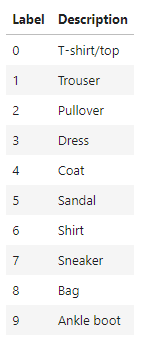

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


index=0
np.set_printoptions(linewidth=320)

In [5]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [7]:
train_images.shape,test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
len(train_labels)

60000

In [9]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
print(f'LABEL:{train_labels[index]}')
print(f'Image pixel array:\n{train_images[index]}')

LABEL:9
Image pixel array:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0

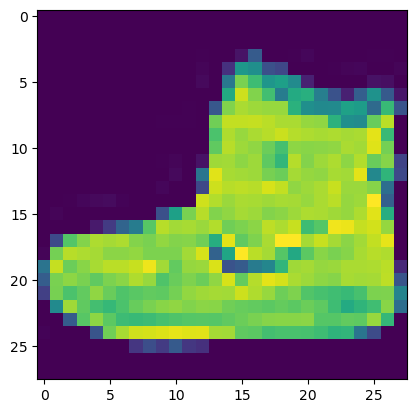

In [11]:
plt.imshow(train_images[index])

In [12]:
# normalize the pixel values of the train and test images 
train_images=train_images/250.0
test_images=test_images/255.0

In [13]:
model=tf.keras.models.Sequential(
    [keras.layers.Flatten(),
     keras.layers.Dense(128,activation=tf.nn.relu),
     keras.layers.Dense(10,activation=tf.nn.softmax)
    ]
)

Sequential: That defines a sequence of layers in the neural network.

Flatten: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

ReLU effectively means:

if x > 0: 
  return x

else: 
  return 0
In other words, it only passes values greater than 0 to the next layer in the network.

Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this lecture if you want to know more about the Softmax function and how the values are computed.

In [14]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4998 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3751 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3381 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3134 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2969 - accuracy: 0.8920


In [15]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3542 - accuracy: 0.8701


[0.3542385995388031, 0.8701000213623047]

In [16]:
np.set_printoptions(linewidth=320)

# exercise to tweak values

**Exercise 1:**

For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [17]:
classification=model.predict(test_images)

313/313 [==============================] - 0s 875us/step


In [18]:
print(classification[0])

[9.7731914e-05 1.9413811e-07 2.2861072e-06 9.1009191e-08 1.4150640e-05 1.5494766e-02 3.4748264e-05 2.0186192e-01 2.8816349e-04 7.8220594e-01]


In [19]:
test_labels[0]

9

**E1Q1: What does this list represent?**

It's 10 random meaningless values
It's the first 10 classifications that the computer made
It's the probability that this item is each of the 10 classes

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

# Exercise 2:

Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [20]:
model=tf.keras.models.Sequential(
    [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ]
)

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

In [22]:
model.fit(train_images,train_labels,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4746
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3566
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3242
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2995
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2820


In [23]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3476


0.3476194739341736

In [24]:
classification=model.predict(test_images)

313/313 [==============================] - 0s 941us/step


In [25]:
print(classification[0])

[1.2998734e-07 6.6369388e-08 9.0145285e-08 3.4329342e-09 3.7324131e-08 4.6697725e-04 4.4411472e-06 1.1528803e-02 1.7344345e-06 9.8799765e-01]


In [26]:
print(test_labels[0])

9


# Exercise 5:

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.


# Answer
There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

In [27]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(train_images, train_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4733
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3585
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2978
Epoch 5/5
313/313 [==============================] - 0s 930us/step
[4.70664463e-06 1.16851406e-05 1.76660831e-06 3.57791259e-06 2.76055221e-06 1.40859885e-02 8.63907098e-06 9.43152234e-02 5.97283770e-06 8.91559720e-01]
9


In [79]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

# training_images=training_images/255.0 # Experiment with removing this line
# test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 4.1882
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5288
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5097
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4944
Epoch 5/5
313/313 [==============================] - 0s 813us/step
[9.32876416e-14 5.64234951e-18 6.44623413e-15 4.75012994e-14 1.57620494e-19 1.23476535e-01 2.12781836e-16 2.32333895e-02 6.60246187e-08 8.53289962e-01]
9


# Exercise 8:
Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 60% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [82]:
class myCallsback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<0.4):
            print('\nReached 80% accuracy so cancelling training!')
            self.model.stop_training =True

callbacks=myCallsback()
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model=tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ]
)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4747 - accuracy: 0.8294
Epoch 2/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.3578 - accuracy: 0.8680
Reached 80% accuracy so cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3580 - accuracy: 0.8680
